<html>

<head>
<meta charset="UTF-8">
<title>Title of the document</title>
</head>

<body>
<h1 id="title">Plots from X-ray absorption calculations using ORCA</h1>
<p>Presentation of the feature engineering applied for ORCA outputs</p>
<p>Data presented here, as new inputs for this jupyter-notebook, comes from the written-shell pipeline created to extract X-ray excited-state features from some specific pair of atoms group (e.g. pair amino acid).</p>
<p>Outputs here are filtered features that account for specific transitions (coreMO -> virtualMO) for the specific pair of atoms group.</p>
</body>
</html>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import csv as csv
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure
from __future__ import print_function
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import math

____________________________

In [24]:
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [25]:
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18

--------------

<html>

<head>
<meta charset="UTF-8">
<title>Title of the document</title>
</head>

<body>
<h1 id="title">Löwdin Population analysis from </h1>
<h2 id="title"> X-ray absorption spectra calculated using DFT/ROCIS zora </h2>
<h3 id="title">    System of study RWG4MG3: W ${---}$ M</h3>
<h4 id="title">   non-covalent interaction distance </h4>
</body>
</html>


#### Loading matrices (data from the pipeline's outputs)
Data in .csv format
##### residue called as A is acting as one at the ground state amino acid
> ##### resA core MO
##### residue called as B is acting as one at the virtual state amino acid
> ##### resB virtual MO

In a pair-aa interaction, e.g. Phe-Tyr, Phenylalanine stands for resA core MO and Tyrosine for resB virtual MO. And after, Tyrosine stands for resA core MO and Phenylalanine for resB virtual MO. Both are calculated and are within the spectra.

> ##### resA core MO - Sulfur from Methionine

In [38]:
relpath = "xray_pipeline_results/"
resa_A = "resA_MOcore_"
post = ".csv"

In [36]:
dict_suf = {"RWG4MG3_rocisdft": 101}

In [33]:
for ii in dict_suf:
    print(ii,str(dict_suf[ii]))

RWG4MG3_rocisdft 101


In [41]:
for ii in dict_suf:
    globals()['resa_mocore_%s_raw' % str(dict_suf[ii])] = \
    pd.read_csv(relpath+resa_A+ii+post, delimiter=',', index_col='num-1')

resa_mocore_101_raw#.head()

,sym,lvl,63,64,65
num-1,,,,,
87,S,p,49.3,50.3,0.4


> ##### resB virt MO - RWG4MG3

In [40]:
resb_B = "resB_MOvirt_"

In [42]:
for ii in dict_suf:
    globals()['resb_movirt_%s_raw' % str(dict_suf[ii])] = \
    pd.read_csv(relpath+resb_B+ii+post, delimiter=',', index_col='num-1')

resb_movirt_101_raw

,sym,lvl,236,237,238,239,240,241,242,243,...,277,278,279,280,282,284,285,287,289,290
num-1,,,,,,,,,,,,,,,,,,,,,
0,atom,lvlMO,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.1,...,0.6,0.8,1.1,0.7,1.7,0.0,0.5,0.0,0.1,0.5
1,atom,lvlMO,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,...,0.5,2.9,0.0,1.5,1.5,0.0,0.4,0.0,0.4,0.0
2,atom,lvlMO,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,...,2.1,0.0,4.1,0.3,4.9,0.2,1.4,0.1,0.0,1.4
3,atom,lvlMO,0.0,0.0,0.0,0.0,0.0,0.0,1.3,0.0,...,1.7,0.6,0.6,1.0,1.0,0.3,1.2,0.1,0.2,0.6
4,atom,lvlMO,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.1,...,0.6,0.1,0.2,1.3,0.5,0.5,1.3,0.1,0.2,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,atom,lvlMO,0.0,0.1,0.0,0.3,0.6,0.1,0.9,2.0,...,0.5,0.6,3.1,0.1,5.6,1.1,0.0,1.0,0.1,0.2
113,atom,lvlMO,0.0,0.0,0.2,1.1,0.3,0.7,12.8,13.5,...,0.9,0.5,1.3,0.6,0.3,0.7,1.3,0.8,0.1,1.2
114,atom,lvlMO,0.0,0.0,0.1,0.5,0.2,0.2,5.6,6.5,...,0.6,0.4,0.2,0.2,0.3,0.1,1.3,0.1,0.0,0.2


<html>


<body>
<h1 id="title">Features from  X-ray excited-state properties: </h1>
<h2 id="title">1. The number of transitions </h2>
<h2 id="title">2. The transitions averaged probability </h2>
<h2 id="title">3. The oscillator strength using electronic dipole moment as operator </h2>
<h2 id="title">4. The oscillator strength using velocity dipole moment as operator </h2>
</body>
</html>

#### coreMO vs. virtual MO (core/virt MO)

> ### 1. core/virt MO as function of the number of transitions

In [43]:
resab_AB = "corevirtMO_matrix_"
for ii in dict_suf:
    globals()['corevirtMO_matrix_%s_raw' % str(dict_suf[ii])] = \
    pd.read_csv(relpath+resab_AB+ii+post, delimiter=',', index_col='virt\core')

corevirtMO_matrix_101_raw.head()

,63,64,65
virt\core,,,
236,88,89,60
237,146,131,70
238,202,223,120
239,191,200,120
240,129,165,77


> ### 2. core/virt MO as function of the number of transitions averaged probability

In [44]:
resab_ts_AB = "corevirtMO_matrix_tspb_"
for ii in dict_suf:
    globals()['corevirtMO_matrix_tspb_%s_raw' % str(dict_suf[ii])] = \
    pd.read_csv(relpath+resab_ts_AB+ii+post, delimiter=',', index_col='virt\core')

corevirtMO_matrix_tspb_101_raw.head()

,63,64,65
virt\core,,,
236,0.112624,0.098984,0.172587
237,0.098578,0.098135,0.164395
238,0.050327,0.040010,0.071141
239,0.061031,0.051266,0.093382
240,0.120374,0.077721,0.142019


> ### 3. core/virt MO as function of the oscillator strength including all the corrections in the dipole moment operator: ELECTRIC DIPOLE + MAGNETIC DIPOLE + ELECTRIC QUADRUPOLE

In [46]:
resab_fosc_AB = "corevirt_fosc_corr_"
for ii in dict_suf:
    globals()['corevirt_mo_fosc_%s_raw' % str(dict_suf[ii])] = \
    pd.read_csv(relpath+resab_fosc_AB+ii+post, delimiter=',', index_col='virt\core')
    
corevirt_mo_fosc_101_raw.head()

,63,64,65
virt\core,,,
236,0.000219,0.002003,0.000503
237,0.001106,0.000752,0.000459
238,0.000719,0.001426,0.000471
239,0.001041,0.000709,0.000206
240,0.000457,0.003169,0.000679


> ### 4. core/virt MO as function of the oscillator strength including all the corrections in the dipole moment operator: ELECTRIC DIPOLE + MAGNETIC DIPOLE + ELECTRIC QUADRUPOLE
> #### by weighted average (WAM)

In [47]:
resab_foscw_AB = "corevirt_foscw_corr_"
for ii in dict_suf:
    globals()['corevirt_mo_foscw_%s_raw' % str(dict_suf[ii])] = \
    pd.read_csv(relpath+resab_foscw_AB+ii+post, delimiter=',', index_col='virt\core')
    
corevirt_mo_foscw_101_raw.head()

,63,64,65
virt\core,,,
236,0.000061,0.000538,0.000139
237,0.000324,0.000219,0.000129
238,0.000212,0.000425,0.000142
239,0.000309,0.000202,0.000058
240,0.000134,0.000947,0.000228


### Main functions to present data according to the features

In [48]:
def selecting_atm_matrix(df, atoms_list):
    """
    it returns MO matrix (df) having just the atoms in atoms_list.
    """
    col_list = df.index.tolist() #listing index (elements from column 0)
    #dff = df.loc[:, (df != 0).any(axis=0)] #removing zero columns
    return df.loc[[i for i in atoms_list if i in col_list]] #returning just columns in the both lists intersection
#atoms_core=resa_mocore_GFG9Y_raw.index.tolist() #all C-core atoms
#[i for i in atoms_a if i in atoms_core] #atoms_a intersection atoms_core

In [49]:
def nonzero_mo_matrix(df):
    """
    it returns MO matrix (df) having just non-zero MO population.
    """
    return df.loc[:, (df != 0).any(axis=0)] #removing zero columns

In [50]:
def crop_by_loewdin_p(df,pop):
    """
    it returns MO matrix (df) having just a Loewdin MO population contribution greater than (100*pop)%.
    pop is a number between 0 and 1.
    """
    #cols = [col for col, val in df.sum()[2:].iteritems() if val > (pop*100)]
    cols = [col for col, val in df.sum()[2:].items() if val > (pop*100)]
    #iteritem() create a zip with the index_col and the values
    cols.insert(0,'lvl')
    cols.insert(0,'sym')
    #to add on the top the first two columns removed in the previous sum() evaluation
    return df[cols] #showing the fisrt two columns and those having population greater than pop*100%

In [51]:
def cropping_matrix(df, df1, df2):
    """
    it returns a cropped MO matrix from df using as parameters the indices in df1 and df2.
    df1 index are column names from df and df2 index are the rows from df
    """
    try:
        dff = df[df1.axes[1][2:].tolist()] #saving specific columns
    except KeyError:
        tmp_mo = [item for item in df1.axes[1][2:].tolist() if item in df.axes[1][0:].tolist()]
        #removing items in the first list that are not in the second one
        dff = df[tmp_mo]
    try:
        return dff.loc[[int(i) for i in df2.axes[1][2:].tolist()]] #returning specific rows
    except KeyError:
        tmp_mo2 = [item for item in df2.axes[1][2:].tolist() if int(item) in dff.T.axes[1][0:].tolist()]
        # dff.T to obtain the index_col as the head row
        return dff.loc[[int(i) for i in tmp_mo2]] #returning specific rows
# the first two elements in df2.axes[1] and df1.axes[1] are "sym" and "lvl", that's why I used df.axes[1][2:]

<html>


<body>
<h3 id="title">Reducing Löwdin Population MO matrices by removing non-contributing MO</h3>
<h4> Case for core MO in the resA</h4>
</body>
</html>

In [52]:
for ii in dict_suf:
    globals()['resa_mocore_%s' % str(dict_suf[ii])] = \
    nonzero_mo_matrix(globals()['resa_mocore_%s_raw' % str(dict_suf[ii])])

resa_mocore_101

,sym,lvl,63,64,65
num-1,,,,,
87,S,p,49.3,50.3,0.4


<html>

<body>
<h4> Case for virtual MO in the resB</h4>
</body>
</html>
<html>

In [53]:
for ii in dict_suf:
    globals()['resb_movirt_%s' % str(dict_suf[ii])] = \
    nonzero_mo_matrix(globals()['resb_movirt_%s_raw' % str(dict_suf[ii])])

resb_movirt_101

,sym,lvl,236,237,238,239,240,241,242,243,...,277,278,279,280,282,284,285,287,289,290
num-1,,,,,,,,,,,,,,,,,,,,,
0,atom,lvlMO,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.1,...,0.6,0.8,1.1,0.7,1.7,0.0,0.5,0.0,0.1,0.5
1,atom,lvlMO,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,...,0.5,2.9,0.0,1.5,1.5,0.0,0.4,0.0,0.4,0.0
2,atom,lvlMO,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,...,2.1,0.0,4.1,0.3,4.9,0.2,1.4,0.1,0.0,1.4
3,atom,lvlMO,0.0,0.0,0.0,0.0,0.0,0.0,1.3,0.0,...,1.7,0.6,0.6,1.0,1.0,0.3,1.2,0.1,0.2,0.6
4,atom,lvlMO,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.1,...,0.6,0.1,0.2,1.3,0.5,0.5,1.3,0.1,0.2,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,atom,lvlMO,0.0,0.1,0.0,0.3,0.6,0.1,0.9,2.0,...,0.5,0.6,3.1,0.1,5.6,1.1,0.0,1.0,0.1,0.2
113,atom,lvlMO,0.0,0.0,0.2,1.1,0.3,0.7,12.8,13.5,...,0.9,0.5,1.3,0.6,0.3,0.7,1.3,0.8,0.1,1.2
114,atom,lvlMO,0.0,0.0,0.1,0.5,0.2,0.2,5.6,6.5,...,0.6,0.4,0.2,0.2,0.3,0.1,1.3,0.1,0.0,0.2


___________________________

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h3 id="title">Results</h3>
</body>
</html>

______________________________

### BGA product

In [58]:
def ts_psb_acore_bvirt(acore, bvirt, abcorevirt, atm_to_virtmo=False):
    """
    Do a matrix multiplication between the core-to-virt transition 
    probabilities matrix and the core MO matrix, then the resulting matrix
    is multiplied by the virtual MO matrix.
    if atm_to_virtmo is True, then the two resulting matrices in the 
    multiplication process are returned.
    By the default, just the last matrix is returned.
    """
    abcorevirt.index = abcorevirt.index.astype('str') 
    #to make possible the dot product in pandas, the indexes involved in each
    #product have to "match" in name and type
    
    i = j = 0
    dff = pd.DataFrame(np.zeros((acore.shape[0], abcorevirt.shape[0])), \
                       index=acore.index, columns=abcorevirt.index)
    for j in range(abcorevirt.shape[1]):
        for i in range(acore.shape[1]):
            try:
                dff += acore.T[i:i+1].T.dot(abcorevirt.iloc[:].T[j:j+1])
            except:
                pass
            
    dff = dff/100
    i = j = 0
    dff2 = pd.DataFrame(np.zeros((dff.shape[0], bvirt.shape[0])), \
                        index=dff.index, columns=bvirt.index)
    for i in range(dff.shape[1]):
        for j in range(bvirt.shape[1]):
            try:
                dff2 += dff.T[i:i+1].T.dot(bvirt.T[j:j+1])
            except:
                pass
    
    if atm_to_virtmo:
        return dff, dff2
    else:
        return dff2

In [59]:
heatmap_S_RWG4MG3 = ts_psb_acore_bvirt(resa_mocore_101.T[2:].T,\
                                    resb_movirt_101_raw.T[2:].T,\
                             corevirt_mo_fosc_101_raw)

In [60]:
def sum_Mm(dfbig, dfsmall):
    """
    in a dfbig matrix, the elements from dfsmall matrix are summed according
    to its index and columns matches in dfbig index and columns
    values
    """
    for i in dfsmall.index.values:
        for j in dfsmall.columns.values:
            try:
                dfbig.loc[[i],[j]] += dfsmall.loc[[i],[j]]
            except:
                pass
    return dfbig

In [61]:
heatmap_S_RWG4MG3.index.names = ['core-atom']
heatmap_S_RWG4MG3.columns.names = ['virtual-atom']

In [62]:
sort_heatmap_RWG4MG3 = heatmap_S_RWG4MG3.apply(pd.to_numeric).sort_index(ascending=True)

In [63]:
relmax = sort_heatmap_RWG4MG3.max().max()
relmin = sort_heatmap_RWG4MG3.min().min()

<AxesSubplot:xlabel='virtual-atom', ylabel='core-atom'>

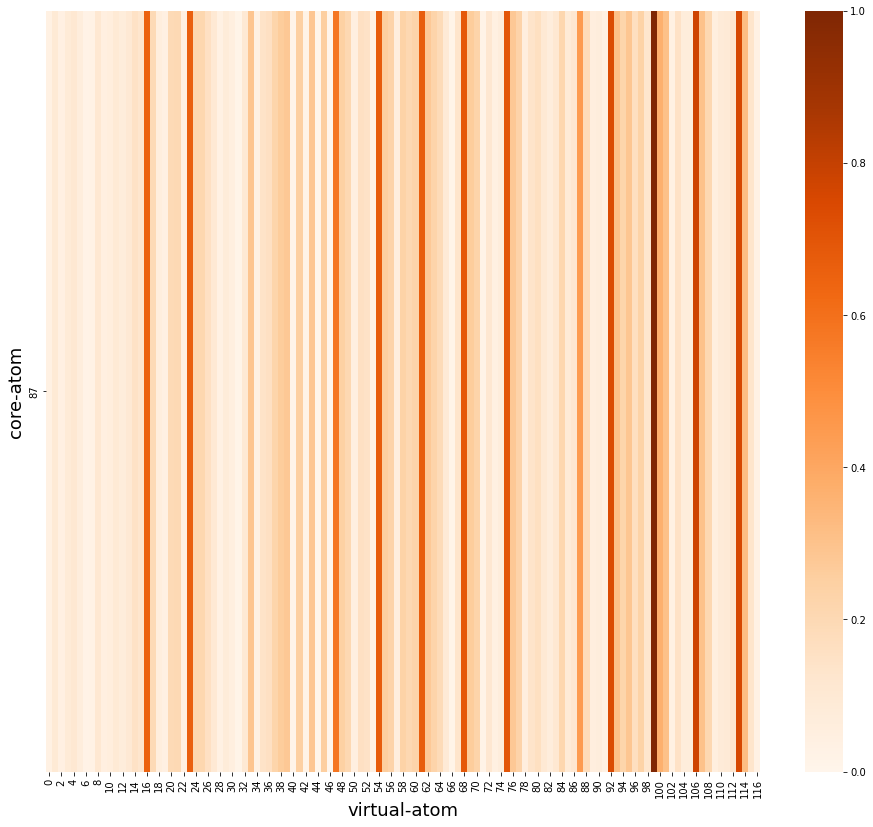

In [64]:
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(16,14)) 

test = (sort_heatmap_RWG4MG3 - relmin)/(relmax - relmin)

sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)
#sns.heatmap(newdf335, annot=False, cmap='Spectral', vmin=min(newdf335.min()), vmax=max(newdf335.max()), ax=ax)
#sns.heatmap(newdf335, annot=False, cmap='Spectral', vmin=0, vmax=30, ax=ax)
#fig.set_size_inches(18.5, 10.5)
#fig.savefig('FGL_FY_35.svg', format="svg")